In [2]:
import pandas as pd

klienci = pd.read_csv("data/klienci.csv")
klienci

,klientID,plec,wiek,roczny_dochod,wskaznik_wydatkow
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<Axes: xlabel='roczny_dochod', ylabel='wskaznik_wydatkow'>

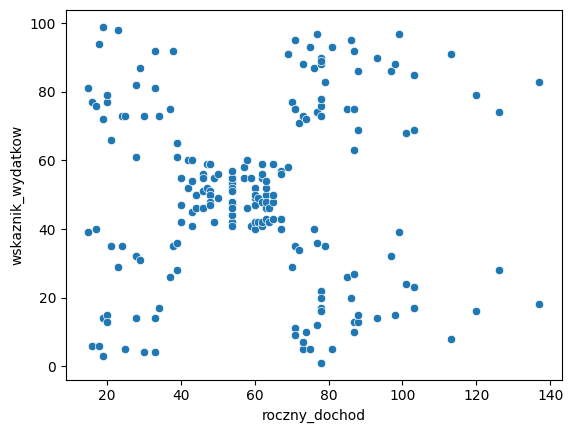

In [4]:
import seaborn as sns

sns.scatterplot(x = klienci["roczny_dochod"], y = klienci["wskaznik_wydatkow"])

In [5]:
from sklearn.preprocessing import StandardScaler

x = klienci[["roczny_dochod", "wskaznik_wydatkow"]]
scaler = StandardScaler()
z = scaler.fit_transform(x)

clusters_kmeans
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


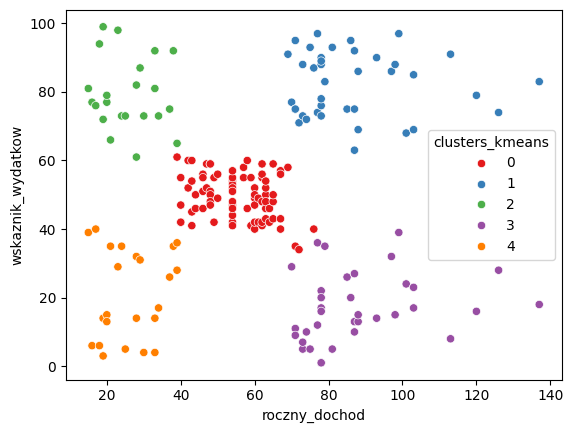

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters_kmeans = kmeans.fit_predict(z)
clusters_kmeans

klienci["clusters_kmeans"] = clusters_kmeans
sns.scatterplot(x = klienci["roczny_dochod"], y = klienci["wskaznik_wydatkow"], hue = klienci["clusters_kmeans"], palette="Set1")
print(klienci["clusters_kmeans"].value_counts())

Ustalenie optymalnej liczby klastrów w KMeans

In [ ]:
from sklearn.metrics import calinski_harabasz_score

inertia = []
ch_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusters_kmeans = kmeans.fit_predict(z)
    inertia.append(kmeans.inertia_) # suma kwadratów odległości punktów od środka klastra
    ch_scores.append(calinski_harabasz_score(z, clusters_kmeans))

print("Inertia:", inertia)
print("Calinski-Harabasz scores:", ch_scores)

Inertia: [273.66888662642015, 157.70400815035947, 109.22822707921345, 65.56840815571681, 60.13287487193422, 49.66824483736798, 37.31912287833883, 32.49508119910091, 30.059322694042205]
Calinski-Harabasz scores: [np.float64(91.40081927586573), np.float64(151.3351212635948), np.float64(173.9210611775394), np.float64(248.64932001536357), np.float64(219.29509412369103), np.float64(226.88550457064687), np.float64(266.5608829108479), np.float64(270.01563352345875), np.float64(259.8148608542566)]


Wykres osypiska

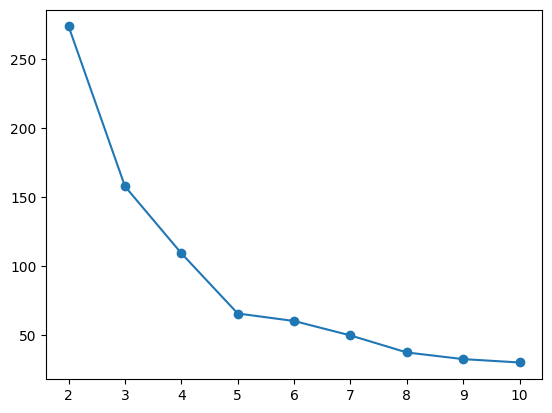

In [45]:
import matplotlib.pyplot as plt

plt.plot(range(2, 11), inertia, marker='o')

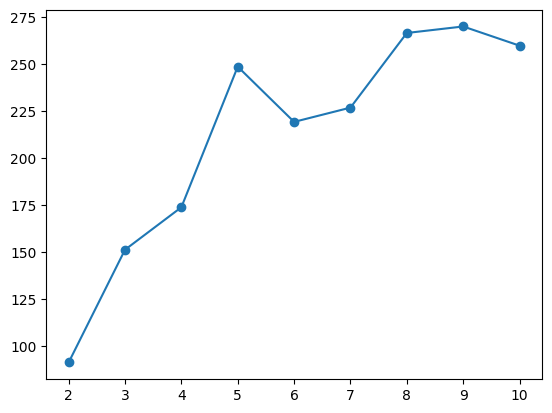

In [46]:
plt.plot(range(2, 11), ch_scores, marker='o')

In [57]:
klienci[["roczny_dochod", "wskaznik_wydatkow", "clusters_kmeans"]].groupby("clusters_kmeans").mean()

,roczny_dochod,wskaznik_wydatkow
clusters_kmeans,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


# Zadanie

In [50]:
auta = pd.read_csv("data/auta.csv", sep=";")
auta

,nr,marka,model,pojemnosc,przebieg,lata,cena,diesel
0,1,Fiat,Fiat Seicento ...,899,52000,5,9500,0
1,2,Volkswagen,Volkswagen Corrado ...,2000,188000,12,15900,0
2,4,Ford,Ford Focus Combi ...,1800,125000,5,27900,1
3,5,Opel,Opel Vectra ...,1800,148000,9,16600,0
4,7,Citroen,Citroen Xsara II ...,1400,70000,5,20000,0
5,8,Toyota,Toyota Avensis ...,1600,105000,6,27500,0
6,9,BMW,BMW 320 ...,2000,164000,11,15600,0
7,10,Peugeot,Peugeot 206 ...,1124,72000,6,16000,0
8,11,Volkswagen,Volkswagen Golf IV ...,1400,52000,3,26500,0
9,12,Audi,Audi A3 ...,1600,108000,5,34000,0


Analiza korelacji przed grupowaniem - wysoka korelacja (powyżej 0,9) między cechami może sugerować, że są one redundantne i nie wnoszą dodatkowej informacji do procesu grupowania.

In [ ]:
auta[["pojemnosc", "przebieg", "lata", "cena"]].corr()

,pojemnosc,przebieg,lata,cena
pojemnosc,1.000000,0.721918,0.360621,0.351001
przebieg,0.721918,1.000000,0.642138,-0.063452
lata,0.360621,0.642138,1.000000,-0.601429
cena,0.351001,-0.063452,-0.601429,1.000000


Sprawdzenie zmienności cech przed grupowaniem za pomocą współczynnika zmienności (odchylenie standardowe podzielone przez średnią) - cechy o wysokiej zmienności mogą być bardziej istotne w procesie grupowania od takich o niskiej zmienności (np. poniżej 5%).

In [ ]:
auta[["pojemnosc", "przebieg", "lata", "cena"]].std()/auta[["pojemnosc", "przebieg", "lata", "cena"]].mean()

pojemnosc    0.198106
przebieg     0.361838
lata         0.359148
cena         0.400801
dtype: float64

In [52]:
x_auta = auta[["pojemnosc", "przebieg", "lata", "cena"]]
scaler_auta = StandardScaler()
z_auta = scaler_auta.fit_transform(x_auta)


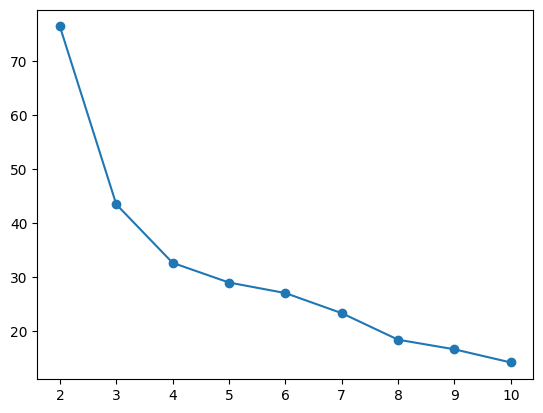

In [54]:
inertia_auta = []
ch_scores_auta = []
for i in range(2, 11):
    kmeans_auta = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusters_kmeans_auta = kmeans_auta.fit_predict(z_auta)
    inertia_auta.append(kmeans_auta.inertia_)
    ch_scores_auta.append(calinski_harabasz_score(z_auta, clusters_kmeans_auta))

plt.plot(range(2, 11), inertia_auta, marker='o') 

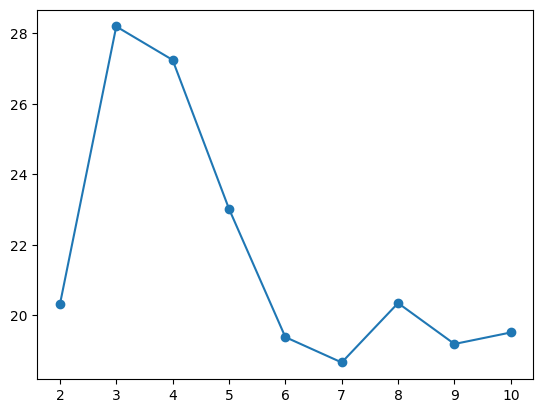

In [55]:
plt.plot(range(2, 11), ch_scores_auta, marker='o')

In [56]:
auta["clusters_kmeans"] = KMeans(n_clusters=3, init='k-means++', random_state=42).fit_predict(z_auta)
auta[["pojemnosc", "przebieg", "lata", "cena", "clusters_kmeans"]].groupby("clusters_kmeans").mean()

,pojemnosc,przebieg,lata,cena
clusters_kmeans,,,,
0,1226.909091,71327.272727,5.727273,14727.181818
1,1674.100000,160800.000000,9.900000,12940.000000
2,1690.909091,124363.636364,5.363636,25963.636364
